In [1]:
import rioxarray
from shapely.geometry import Point, LineString
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = 'D:/crs/proj/2019_CACO_CoastCam/Pixel_instruments/'
r = rioxarray.open_rasterio( data_dir+'2024-016-FA_Marconi_DSM_UTM19N_NAVD88_5cm.tif' )
r

<xarray.DataArray (band: 1, y: 9200, x: 4800)> Size: 177MB
[44160000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 38kB 4.2e+05 4.2e+05 ... 4.202e+05 4.202e+05
  * y            (y) float64 74kB 4.639e+06 4.639e+06 ... 4.638e+06 4.638e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        22.278715133667
    STATISTICS_MEAN:           10.614112274891
    STATISTICS_MINIMUM:        -0.79313826560974
    STATISTICS_STDDEV:         6.7058934454227
    STATISTICS_VALID_PERCENT:  46.51
    _FillValue:                -999.0
    scale_factor:              1.0
    add_offset:                0.0
    units:                     metre

In [3]:
def extract_along_line(xarr, line, n_samples=256):
    '''
    https://stackoverflow.com/questions/62283718/how-to-extract-a-profile-of-value-from-a-raster-along-a-given-line
    '''
    profile = []

    for i in range(n_samples):
        # get next point on the line
        point = line.interpolate(i / n_samples - 1., normalized=True)
        # access the nearest pixel in the xarray
        value = xarr.sel(x=point.x, y=point.y, method="nearest").data
        profile.append(value)
        
    return profile

In [4]:
# define a cross-shore transect using start/end points
a = LineString([Point(420090., 4638375.), Point(420135., 4638390.)])
print('Length: ', a.length )
dx = .1
n_samples = int(a.length/dx)
print(n_samples)

Length:  47.43416490252569
474


In [5]:
# alternatively, define a line with a starting point, length, and azimuth
# (this way we can control the length, and sample evenly)
az = 70. # geographic
angle = np.radians( -(90.-az) ) # math convention, radians
print(angle)
start = Point(420090., 4638375.)
length = 45.
end = Point(start.x + length * np.cos(angle),
            start.y + length * np.sin(angle))
line = LineString([start, end])
print(line)
n_samples = int(1+length/dx)
print(n_samples)
xdist = np.linspace( 0, length, n_samples, endpoint=True )
print(xdist)

-0.3490658503988659
LINESTRING (420090 4638375, 420132.28616793535 4638359.609093551)
451
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17

Text(0.5, 0, 'Cross-shore Distance (m)')

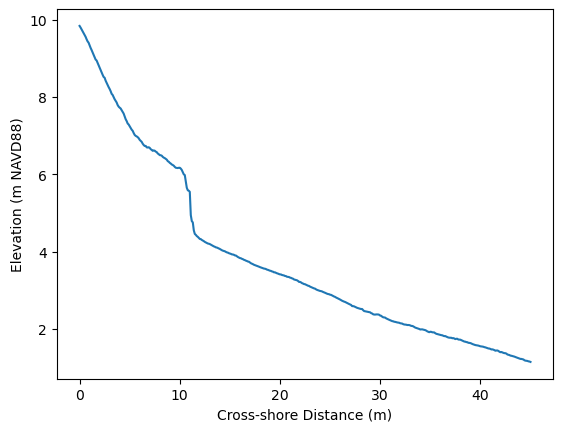

In [6]:
# use the method from above to extract the profile
profile = extract_along_line(r, line, n_samples=n_samples)
plt.plot(xdist, profile)
plt.ylabel('Elevation (m NAVD88)')
plt.xlabel('Cross-shore Distance (m)')